In [4]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

In [10]:
text = "Natural Language Processing is a key area in AI that improves human-computer interactions."
clean_text = re.sub(r'[^\w\s]', '', text.lower())
tokens = word_tokenize(clean_text)
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['natural', 'language', 'processing', 'key', 'area', 'ai', 'improves', 'humancomputer', 'interactions']


In [11]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_words = [stemmer.stem(word) for word in filtered_tokens]
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)

Stemmed Words: ['natur', 'languag', 'process', 'key', 'area', 'ai', 'improv', 'humancomput', 'interact']
Lemmatized Words: ['natural', 'language', 'processing', 'key', 'area', 'ai', 'improves', 'humancomputer', 'interaction']


In [12]:
corpus = ["NLP enables AI to process human language.", "Machine learning improves NLP models.", "AI transforms text analysis."]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

print("TF-IDF Features:", vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

TF-IDF Features: ['ai' 'analysis' 'enables' 'human' 'improves' 'language' 'learning'
 'machine' 'models' 'nlp' 'process' 'text' 'transforms']
TF-IDF Matrix:
 [[0.3349067  0.         0.44036207 0.44036207 0.         0.44036207
  0.         0.         0.         0.3349067  0.44036207 0.
  0.        ]
 [0.         0.         0.         0.         0.46735098 0.
  0.46735098 0.46735098 0.46735098 0.35543247 0.         0.
  0.        ]
 [0.40204024 0.52863461 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.52863461
  0.52863461]]


In [13]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(text)
sentiment = "Positive" if sentiment_scores['compound'] > 0 else "Negative" if sentiment_scores['compound'] < 0 else "Neutral"

print("Sentiment:", sentiment, sentiment_scores)

Sentiment: Positive {'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.6486}


In [14]:
generator = pipeline("text-generation", model="gpt2")
generated_text = generator("AI is revolutionizing", max_length=50, num_return_sequences=1)[0]['generated_text']

print("Generated Text:", generated_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: AI is revolutionizing the way our lives are arranged. Just as we can do whatever we wanted to do a person's life with the consent of the owner, we can do it with the consent of the seller. I want this. The only thing


<ipython-input-15-0834a06f33d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word for word, _ in fd.most_common(10)], y=[freq for _, freq in fd.most_common(10)], palette="magma")


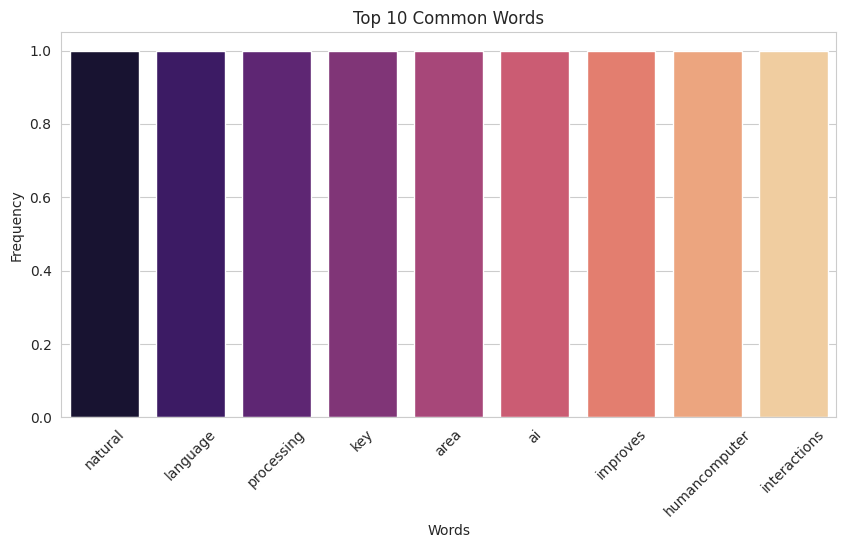

In [15]:
fd = FreqDist(filtered_tokens)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=[word for word, _ in fd.most_common(10)], y=[freq for _, freq in fd.most_common(10)], palette="magma")
plt.title("Top 10 Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()